# 지도시각화 test code

## 00. 기본 설정

In [1]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 주피터 노트북에서 그래프가 보이는 설정
%matplotlib notebook

In [3]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

#------------------------------------------------------------------------------------
#matplotlib 패키지 한글 깨짐 처리 끝

# windows
#plt.rcParams['font.family'] = "NanumBarunGothic" 또는 "Malgun Gothic"
#plt.rcParams['axes.unicode_minus'] = False

# apple 사용자는
#plt.rc("font", family="AppleGothic")
#plt.rc("axes", unicode_minus=False)

In [4]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<IPython.core.display.Javascript object>


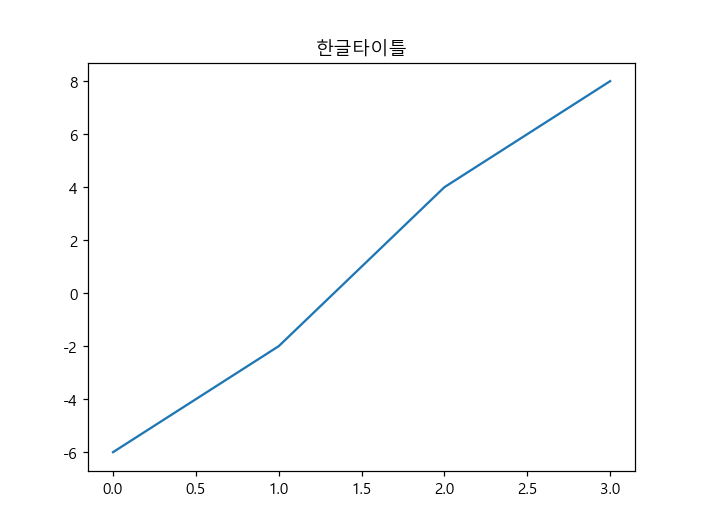

<Axes: title={'center': '한글타이틀'}>

In [5]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

In [6]:
plt.close('all')

## 01. 데이터 불러오기

In [7]:
df = pd.read_excel("data_prep_dd.xlsx")
df.head(3)

,YM,MCT_NM,OP_YMD,TYPE,MCT_TYPE,latitude,longitude,ADDR,RANK_CNT,RANK_AMT,...,HR_18_22_UE_CNT_RAT,HR_23_4_UE_CNT_RAT,LOCAL_UE_CNT_RAT,RC_M12_MAL_CUS_CNT_RAT,RC_M12_FME_CUS_CNT_RAT,RC_M12_AGE_UND_20_CUS_CNT_RAT,RC_M12_AGE_30_CUS_CNT_RAT,RC_M12_AGE_40_CUS_CNT_RAT,RC_M12_AGE_50_CUS_CNT_RAT,RC_M12_AGE_OVR_60_CUS_CNT_RAT
0,202301,희야네식당,20000916,T1,가정식,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,3,4,...,0.000000,0.0,0.381616,0.644,0.356,0.183,0.232,0.351,0.171,0.063
1,202301,희신이네,20060515,T1,가정식,33.263389,126.550838,제주 서귀포시 서홍동 1651-11번지,3,4,...,0.264706,0.0,0.701183,0.686,0.314,0.118,0.261,0.342,0.190,0.089
2,202301,흥미,20030814,T1,가정식,33.490006,126.495004,제주 제주시 연동 291-40번지,4,4,...,0.094340,0.0,0.736842,0.562,0.438,0.107,0.299,0.336,0.226,0.032


In [8]:
# 컬럼명 확인
df.columns

Index(['YM', 'MCT_NM', 'OP_YMD', 'TYPE', 'MCT_TYPE', 'latitude', 'longitude',
       'ADDR', 'RANK_CNT', 'RANK_AMT', 'RANK_MEAN', 'MON_UE_CNT_RAT',
       'TUE_UE_CNT_RAT', 'WED_UE_CNT_RAT', 'THU_UE_CNT_RAT', 'FRI_UE_CNT_RAT',
       'SAT_UE_CNT_RAT', 'SUN_UE_CNT_RAT', 'HR_5_11_UE_CNT_RAT',
       'HR_12_13_UE_CNT_RAT', 'HR_14_17_UE_CNT_RAT', 'HR_18_22_UE_CNT_RAT',
       'HR_23_4_UE_CNT_RAT', 'LOCAL_UE_CNT_RAT', 'RC_M12_MAL_CUS_CNT_RAT',
       'RC_M12_FME_CUS_CNT_RAT', 'RC_M12_AGE_UND_20_CUS_CNT_RAT',
       'RC_M12_AGE_30_CUS_CNT_RAT', 'RC_M12_AGE_40_CUS_CNT_RAT',
       'RC_M12_AGE_50_CUS_CNT_RAT', 'RC_M12_AGE_OVR_60_CUS_CNT_RAT'],
      dtype='object')

In [9]:
df.shape

(67857, 31)

In [10]:
# 현지인이 선택한 맛집 (LOCAK_UE_CNT_RAT)
# TYPE별 구별 위치 분포 (folium 지역/색상 시각화) [TYPE]
# 옵션 [SEASON]
# 계절 먼저 선택 >> 나이별 회원 수 비중이 높은 곳

In [11]:
# 현지인 이용 건수 비중 확인 먼저 >> 필요한 칼럼만 추출
col_names = ['YM', 'MCT_NM', 'MCT_TYPE', 'latitude', 'longitude', 'ADDR',
            'LOCAL_UE_CNT_RAT']

In [12]:
df_local = df[col_names]
df_local.head(1)

,YM,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202301,희야네식당,가정식,33.279498,126.719772,제주 서귀포시 남원읍 남원리 100-3번지,0.381616


In [13]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67857 entries, 0 to 67856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YM                67857 non-null  int64  
 1   MCT_NM            67857 non-null  object 
 2   MCT_TYPE          67857 non-null  object 
 3   latitude          67857 non-null  float64
 4   longitude         67857 non-null  float64
 5   ADDR              67857 non-null  object 
 6   LOCAL_UE_CNT_RAT  67857 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.6+ MB


In [14]:
df_local.describe()

,YM,latitude,longitude,LOCAL_UE_CNT_RAT
count,67857.000000,67857.000000,67857.000000,67857.000000
mean,202306.478801,33.426563,126.519642,0.468005
std,3.445896,0.105855,0.153407,0.298131
min,202301.000000,33.114466,126.164116,0.000000
25%,202303.000000,33.325196,126.463624,0.159108
50%,202307.000000,33.483431,126.514001,0.501193
75%,202309.000000,33.498588,126.562812,0.753606
max,202312.000000,33.963670,126.969007,1.000000


In [15]:
# 현지인이용비중이 0.8 이상인 행만 추출
df_over_80 = df_local[df_local['LOCAL_UE_CNT_RAT'] >= 0.8]
df_over_80.shape

(12109, 7)

In [16]:
# df_over_80 데이터프레임 저장
# df_over_80.to_csv("local_over_80.csv", encoding='cp949', index=False)

## 02. 지도시각화

In [17]:
import folium

In [18]:
# 지도의 중심을 정하기 위해 위도와 경도의 평균을 구함
lat = df_over_80['latitude'].mean() - 0.1
long = df_over_80['longitude'].mean() + 0.05
lat, long

(33.37790730632587, 126.5756362752911)

In [19]:
# zoom_start로 화면 크기 지정
m = folium.Map([lat, long], zoom_start=10)
m

In [47]:
# 우선 테이블의 상위 5개 데이터만 지도에 표시
for i in df_over_80.index[:5]:
    sub_lat = df_over_80.loc[i, 'latitude']
    sub_long = df_over_80.loc[i, 'longitude']
    
    title = df_over_80.loc[i, 'MCT_NM'] + '-' + df_over_80.loc[i, 'ADDR']
    name = df_over_80.loc[i, 'MCT_NM']
    print(i, sub_lat, sub_long, title)
    
    folium.Marker([sub_lat, sub_long], tootip=title,
                  popup=name
                 ).add_to(m)
m

33 33.5204175 126.5875415 후년하우스-제주 제주시 삼양이동 2181-19번지
40 33.4871301 126.4317189 황재돈-제주 제주시 외도일동 551-1번지 고전빌라 102호
45 33.4887035 126.4790161 황금돼지등갈비-제주 제주시 노형동 1068-8번지 천마빌딩 1층
48 33.4903537 126.5347333 황궁갈비-제주 제주시 이도이동 1997-10번지
49 33.4909662 126.4952129 황구촌-제주 제주시 연동 291-118번지


## 03. 현지인 비중 order by

In [38]:
df_local_rank = df_over_80.sort_values('LOCAL_UE_CNT_RAT', ascending=False)
df_local_rank.head(3)

,YM,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
54659,202306,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,1.0
40973,202312,예감공사,커피,33.487821,126.547558,제주 제주시 아라이동 1344-1번지 2층,1.0
60115,202309,샤커,단품요리 전문,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,1.0


In [39]:
# 인덱스 리셋
df_local_rank = df_local_rank.reset_index(drop=True)
df_local_rank.head(3)

,YM,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202306,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,1.0
1,202312,예감공사,커피,33.487821,126.547558,제주 제주시 아라이동 1344-1번지 2층,1.0
2,202309,샤커,단품요리 전문,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,1.0


In [40]:
df_local_rank.shape

(12109, 7)

In [41]:
# 현지인 비중이 1인 식당은 총 113개 
count = df_local_rank[df_local_rank['LOCAL_UE_CNT_RAT'] == 1].shape[0]
count

113

In [42]:
# 각 월별 현지인 이용 비중이 가장 높은 상위 3개 식당을 추출
top_5_per_month = df_local_rank.groupby('YM').apply(lambda x: x.nlargest(3, 'LOCAL_UE_CNT_RAT')).reset_index(drop=True)
top_5_per_month

,YM,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
0,202301,도원유통,분식,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
1,202301,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,1.0
2,202301,제주씨푸드,단품요리 전문,33.524111,126.589783,제주 제주시 삼양일동 1662-12번지,1.0
3,202302,미식가,가정식,33.308245,126.164600,제주 제주시 한경면 고산리 3615-6번지,1.0
4,202302,사쿠라,가정식,33.486351,126.431391,제주 제주시 외도일동 549-6번지 2층,1.0
5,202302,도원유통,분식,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
6,202303,도원유통,분식,33.487330,126.485356,제주 제주시 노형동 916-4번지 1층,1.0
7,202303,아하,가정식,33.489122,126.492585,제주 제주시 연동 282-17번지 3층,1.0
8,202303,일도돈,가정식,33.506086,126.540674,제주 제주시 일도이동 378-4번지 동명빌딩 1층,1.0
9,202304,비에이치,치킨,33.476915,126.450666,제주 제주시 도평동 965-2번지,1.0


In [43]:
df_local_rank.shape

(12109, 7)

In [44]:
highest_local_rate_by_type = df_local_rank.loc[df_local_rank.groupby(['YM', 'MCT_TYPE'])['LOCAL_UE_CNT_RAT'].idxmax()]
highest_local_rate_by_type

,YM,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT
103,202301,차화술,가정식,33.509923,126.532849,제주 제주시 일도이동 1020-21번지 2층,1.000000
1321,202301,케이티 구내식당,구내식당/푸드코트,33.503960,126.525223,제주 제주시 이도일동 1643-1번지,0.899160
7323,202301,양육점,기타세계요리,33.504212,126.541121,제주 제주시 일도이동 414-3번지 1층,0.837838
703,202301,토대력올레점,꼬치구이,33.502363,126.542510,제주 제주시 이도이동 408-6번지,0.912485
17,202301,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,1.000000
...,...,...,...,...,...,...,...
1,202312,예감공사,커피,33.487821,126.547558,제주 제주시 아라이동 1344-1번지 2층,1.000000
9906,202312,(유)아웃백스테이크하우스 제주아일랜드점,패밀리 레스토랑,33.481183,126.502509,제주 제주시 오라이동 3173번지 1층,0.817702
924,202312,꼬까삐,포장마차,33.496231,126.527141,제주 제주시 도남동 918-14번지,0.906921
314,202312,난타오천도남점,피자,33.495291,126.527237,제주 제주시 도남동 52번지,0.930403


In [45]:
high_rate_02 = highest_local_rate_by_type[highest_local_rate_by_type['YM'] == 202302]

In [57]:
# 우선 테이블의 상위 5개 데이터만 지도에 표시
for i in high_rate_02[:10].index:
    sub_lat = high_rate_02.loc[i, 'latitude']
    sub_long = high_rate_02.loc[i, 'longitude']
    
    title = high_rate_02.loc[i, 'MCT_NM'] + '-' + high_rate_02.loc[i, 'ADDR']
    name = high_rate_02.loc[i, 'MCT_NM']
    print(i, sub_lat, sub_long, title)
    
    folium.Marker([sub_lat, sub_long], tootip=title,
                  popup=name
                 ).add_to(m)
m

3 33.3082455 126.1645996 미식가-제주 제주시 한경면 고산리 3615-6번지
1841 33.4979745 126.5339699 떡하니-제주 제주시 이도이동 1037번지 원영주택 1층 8호
671 33.5171205 126.5799811 맥주당-제주 제주시 도련일동 1938-1번지 1층
253 33.5173015 126.5882779 승쁨당삼화지구점-제주 제주시 삼양이동 2332-7번지 1층
3255 33.5146371 126.5250441 칠성뷔페-제주 제주시 일도일동 1298-28번지 4층
15 33.4873301 126.4853556 도원유통-제주 제주시 노형동 916-4번지 1층
3418 33.5162883 126.5803079 롯데리아제주삼화지구점-제주 제주시 도련일동 1938-5번지
1084 33.4941713 126.5477284 아이스크림상회(베라체점)-제주 제주시 이도이동 1955-3번지 103호
1365 33.5039604 126.5252235 케이티 구내식당-제주 제주시 이도일동 1643-1번지
195 33.501458 126.5273691 현숙-제주 제주시 이도일동 1786-17번지


## 04. TYPE 정리

In [46]:
# TYPE별 현지인 이용 비중이 0.8를 넘는 식당 수
type_count = df_local_rank['MCT_TYPE'].value_counts()
type_count

# 기사식당 T3, 민속주점 T12, 스테이크 T17, 야식 T19, 주스 T22는 0.8을 넘는 가게가 없음

MCT_TYPE
단품요리 전문      4416
가정식          3575
치킨            744
커피            649
베이커리          459
분식            402
맥주/요리주점       378
중식            354
양식            281
피자            191
꼬치구이          179
일식            148
아이스크림/빙수      130
떡/한과           38
구내식당/푸드코트      31
햄버거            23
샌드위치/토스트       21
도시락            21
기타세계요리         18
패밀리 레스토랑       16
부페             14
포장마차            8
동남아/인도음식        5
차               5
도너츠             3
Name: count, dtype: int64

In [47]:
# 비중이 0.8을 넘는 TYPE은 25개, 나머지 5개는 없음
type_count.count()

25

<hr>

----- 가정식 T1  
----- 꼬치구이	T5  
----- 단품요리 전문 T6   
----- 맥주/요리주점	T11  
----- 베이커리	T13  
----- 분식	T15  
----- 양식	T20  
----- 일식	T21  
----- 중식	T23  
----- 치킨	T25  
----- 커피	T26  
----- 피자	T29  

##### 합칠 카테고리
**패스트푸드/간단한 식사**  
구내식당/푸드코트 T2  
도시락	T8   
샌드위치/토스트	T16  
햄버거	T30  
포장마차	T28  

<br>

**디저트/간식**  
도너츠	T7  
떡/한과	T10  
아이스크림/빙수 T18  
차	T24  

<br>

**세계 요리**  
기타세계요리	T4  
동남아/인도음식	T9  
부페	T14  
패밀리 레스토랑	T27  

In [48]:
# 카테고리 변경
df_local_rank['MCT_TYPE'] = df_local_rank['MCT_TYPE'].replace({
    '구내식당/푸드코트': '패스트푸드/간단한 식사',
    '도시락': '패스트푸드/간단한 식사',
    '샌드위치/토스트': '패스트푸드/간단한 식사',
    '햄버거': '패스트푸드/간단한 식사',
    '포장마차': '패스트푸드/간단한 식사',
    
    '도너츠': '디저트/간식',
    '떡/한과': '디저트/간식',
    '아이스크림/빙수': '디저트/간식',
    '차': '디저트/간식',
    
    '기타세계요리': '세계 요리',
    '동남아/인도음식': '세계 요리',
    '부페': '세계 요리',
    '패밀리 레스토랑': '세계 요리'
})

df_local_rank['MCT_TYPE'].value_counts()

MCT_TYPE
단품요리 전문         4416
가정식             3575
치킨               744
커피               649
베이커리             459
분식               402
맥주/요리주점          378
중식               354
양식               281
피자               191
꼬치구이             179
디저트/간식           176
일식               148
패스트푸드/간단한 식사     104
세계 요리             53
Name: count, dtype: int64

## 05. MM 열 추가

In [49]:
# YM에서 월만 추출하여 저장
df_local_rank['MONTH'] = df_local_rank['YM'].astype(str).str[-2:] + '월'
df_local_rank.head(3)

,YM,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT,MONTH
0,202306,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,1.0,06월
1,202312,예감공사,커피,33.487821,126.547558,제주 제주시 아라이동 1344-1번지 2층,1.0,12월
2,202309,샤커,단품요리 전문,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,1.0,09월


In [53]:
# YM 열 삭제
df_local_rank_m = df_local_rank.drop(columns=['YM'])
df_local_rank_m.head(3)

,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT,MONTH
0,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,1.0,06월
1,예감공사,커피,33.487821,126.547558,제주 제주시 아라이동 1344-1번지 2층,1.0,12월
2,샤커,단품요리 전문,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,1.0,09월


<hr>

## 05. 비율을 백분율로 변경

In [54]:
df_local_rank_m['LOCAL_UE_CNT_RAT'] = (df_local_rank_m['LOCAL_UE_CNT_RAT'] * 100).round(2)
df_local_rank_m.head(3)

,MCT_NM,MCT_TYPE,latitude,longitude,ADDR,LOCAL_UE_CNT_RAT,MONTH
0,주식회사장인의집,단품요리 전문,33.364338,126.355203,제주 제주시 애월읍 봉성리 3404-2번지 1층,100.0,06월
1,예감공사,커피,33.487821,126.547558,제주 제주시 아라이동 1344-1번지 2층,100.0,12월
2,샤커,단품요리 전문,33.487672,126.431772,제주 제주시 외도일동 550-7번지 2층,100.0,09월


## 05. .csv로 저장

In [55]:
# df_local_rank를 local_over_80.csv로 저장
df_local_rank_m.to_csv('local_over_80.csv', index=False, encoding='cp949')